# Machine Learning in Python (scikit-learn)



## Scikit-learn feature engineering


First we need to import `sklearn`:

In [3]:
import sklearn

The `sklearn` package provides information about its own structure when we use the help command:


In [4]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

In [5]:
data = ['India', 'US', 'Japan', 'US', 'Japan']
data

['India', 'US', 'Japan', 'US', 'Japan']

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(np.array(data).reshape(-1,1))

In [7]:
print(onehot_encoded)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [8]:
print(onehot_encoder.get_feature_names_out())

['x0_India' 'x0_Japan' 'x0_US']


In [9]:
print(onehot_encoder.categories_)

[array(['India', 'Japan', 'US'], dtype='<U5')]


In [10]:
inverted = onehot_encoder.inverse_transform(onehot_encoded)
print(inverted)

[['India']
 ['US']
 ['Japan']
 ['US']
 ['Japan']]


#### Text features -- CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is a  be second document.',
     'And this is the third one.',
     'Is this the first document?',
     "Something that does not exist at all."
 ]

vectorizer = CountVectorizer()
x= vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['all', 'and', 'at', 'be', 'document', 'does', 'exist', 'first',
       'is', 'not', 'one', 'second', 'something', 'that', 'the', 'third',
       'this'], dtype=object)

In [12]:
vectorizer?
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [13]:
vectorizer.vocabulary_

{'this': 16,
 'is': 8,
 'the': 14,
 'first': 7,
 'document': 4,
 'be': 3,
 'second': 11,
 'and': 1,
 'third': 15,
 'one': 10,
 'something': 12,
 'that': 13,
 'does': 5,
 'not': 9,
 'exist': 6,
 'at': 2,
 'all': 0}

In [14]:
print(x.toarray())

[[0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1]
 [0 0 0 1 2 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1]
 [1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0]]


In [15]:
import numpy as np
np.sum(x.toarray(), axis=0)

array([1, 1, 1, 1, 4, 1, 1, 2, 4, 1, 1, 1, 1, 1, 3, 1, 4])

In [16]:
vectorizer.inverse_transform(x)[0]

array(['this', 'is', 'the', 'first', 'document'], dtype='<U9')

#### Text features -- TfidfVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
'''
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
'''
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(x.shape)
print(x.toarray())

['all' 'and' 'at' 'be' 'document' 'does' 'exist' 'first' 'is' 'not' 'one'
 'second' 'something' 'that' 'the' 'third' 'this']
(5, 17)
[[0.         0.         0.         0.         0.45330084 0.
  0.         0.54608616 0.38133096 0.         0.         0.
  0.         0.         0.45330084 0.         0.38133096]
 [0.         0.         0.         0.47517577 0.6364615  0.
  0.         0.         0.26770574 0.         0.         0.47517577
  0.         0.         0.         0.         0.26770574]
 [0.         0.49487286 0.         0.         0.         0.
  0.         0.         0.27880274 0.         0.49487286 0.
  0.         0.         0.33142212 0.49487286 0.27880274]
 [0.         0.         0.         0.         0.45330084 0.
  0.         0.54608616 0.38133096 0.         0.         0.
  0.         0.         0.45330084 0.         0.38133096]
 [0.37796447 0.         0.37796447 0.         0.         0.37796447
  0.37796447 0.         0.         0.37796447 0.         0.
  0.37796447 0.3779

In [18]:
print(vectorizer.get_feature_names_out())
print(corpus[2])
print(x.toarray()[2])

['all' 'and' 'at' 'be' 'document' 'does' 'exist' 'first' 'is' 'not' 'one'
 'second' 'something' 'that' 'the' 'third' 'this']
And this is the third one.
[0.         0.49487286 0.         0.         0.         0.
 0.         0.         0.27880274 0.         0.49487286 0.
 0.         0.         0.33142212 0.49487286 0.27880274]


In [19]:
feat = vectorizer.get_feature_names_out()
val = x.toarray()[2]
for i in range(len(feat)):
  print(feat[i], val[i])

all 0.0
and 0.49487286049138934
at 0.0
be 0.0
document 0.0
does 0.0
exist 0.0
first 0.0
is 0.27880273740443573
not 0.0
one 0.49487286049138934
second 0.0
something 0.0
that 0.0
the 0.33142212219282524
third 0.49487286049138934
this 0.27880273740443573


<BarContainer object of 17 artists>

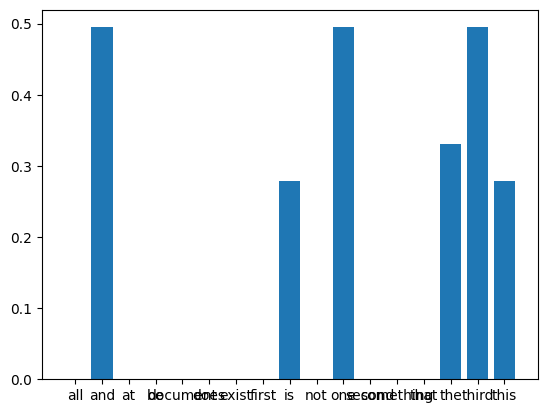

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(feat, val)


Reference: https://scikit-learn.org.

<BarContainer object of 17 artists>

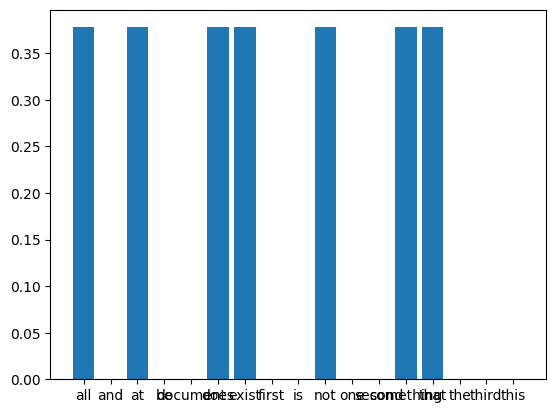

In [21]:
plt.bar(feat, x.toarray()[4])